<a href="https://colab.research.google.com/github/Higterry/hello-world/blob/master/Wu_Haiyue_cldnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Haiyue Wu
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [3]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [0]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

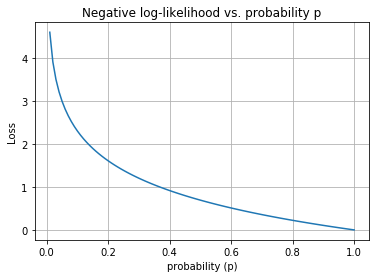

In [0]:
#Show cross-entropy loss function

p = np.zeros(100)
y = np.zeros(100)
for i in range(100):
  p[i] = 0.01*(i+1)
  y[i] = -np.log(p[i])
  
fig, ax = plt.subplots()
ax.plot(p, y)

ax.set(xlabel='probability (p)', ylabel='Loss',
       title='Negative log-likelihood vs. probability p')
ax.grid()

plt.show()
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: The negative log-likelihood reaches infinitu when p is 0, and reaches 0 when input is 1.

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: The NLL can differentiate the cost well when probility is small; it can convert a product of factors into a summation of factors; and it is a monotone transformation. 




#Part 2: Overfit CNN

In [0]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here

    model = Sequential()
    model.add(Conv2D(256,
                     (3,3),
                     activation='sigmoid',
                     input_shape=(28, 28, 1)))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(10,
                    activation="softmax"))
    
    model.summary()
                     
    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_overfit.compile(loss='mean_squared_error',
                    optimizer='RMSprop',
                    metrics=['accuracy'])
#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_overfit_mdata = CNN_overfit.fit(data_train, labels_train,batch_size=1000,
                                    validation_data=(data_test, labels_test),
                                    epochs=200,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN

scores = CNN_overfit.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

W0914 18:37:23.891328 140639522826112 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0914 18:37:23.929511 140639522826112 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0914 18:37:23.939626 140639522826112 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0914 18:37:23.968843 140639522826112 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0914 18:37:24.001473 140639522826112 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               320100    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
__________

W0914 18:37:24.279011 140639522826112 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 19s 322us/step - loss: 0.0920 - acc: 0.1030 - val_loss: 0.0900 - val_acc: 0.1000
Epoch 2/200
60000/60000 [==============================] - 12s 195us/step - loss: 0.0845 - acc: 0.2312 - val_loss: 0.0850 - val_acc: 0.2906
Epoch 3/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0575 - acc: 0.5465 - val_loss: 0.0485 - val_acc: 0.6211
Epoch 4/200
60000/60000 [==============================] - 12s 198us/step - loss: 0.0456 - acc: 0.6542 - val_loss: 0.0415 - val_acc: 0.7040
Epoch 5/200
60000/60000 [==============================] - 12s 197us/step - loss: 0.0409 - acc: 0.6967 - val_loss: 0.0403 - val_acc: 0.7018
Epoch 6/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.0375 - acc: 0.7237 - val_loss: 0.0345 - val_acc: 0.7432
Epoch 7/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.0351 - acc: 0.7417 - val_l

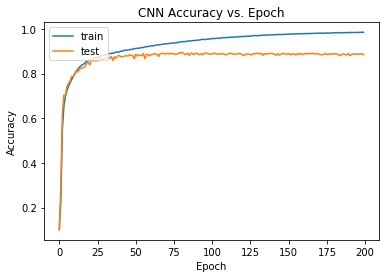

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_overfit_mdata.history['acc'])
plt.plot(CNN_overfit_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


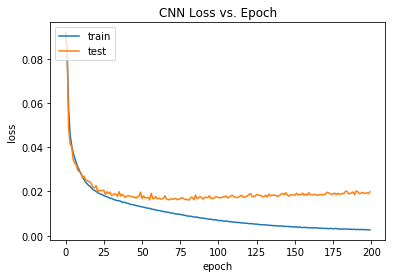

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_overfit_mdata.history['loss'])
plt.plot(CNN_overfit_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: It goes to CNN_overfit_mdata.history['loss']

2.   What does the loss of the testing set go to? 

  ANS: CNN_overfit_mdata.history['val_loss']
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS:The training has an overfitting issue.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The CNN networks are fully connected without dropout, which makes great redundancy in the model and causes overfitting. One way is to add dropout, another is to add regularization.  

#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
  
    model = Sequential()
    
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256,
                     (3,3),
                     activation='sigmoid',
                     input_shape=(28, 28, 1)))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(10,
                    activation="softmax"))
                     
    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_in.compile(loss='mean_squared_error',
                    optimizer='RMSprop',
                    metrics=['accuracy'])
#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_in_mdata = CNN_dropout_in.fit(data_train, labels_train,batch_size=1000,
                                    validation_data=(data_test, labels_test),
                                    epochs=200,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN

scores = CNN_dropout_in.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

W0914 19:17:06.417063 140639522826112 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 203us/step - loss: 0.0906 - acc: 0.1008 - val_loss: 0.0898 - val_acc: 0.1721
Epoch 2/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.0815 - acc: 0.2753 - val_loss: 0.0603 - val_acc: 0.5444
Epoch 3/200
60000/60000 [==============================] - 12s 198us/step - loss: 0.0544 - acc: 0.5837 - val_loss: 0.0473 - val_acc: 0.6325
Epoch 4/200
60000/60000 [==============================] - 12s 198us/step - loss: 0.0454 - acc: 0.6610 - val_loss: 0.0457 - val_acc: 0.6557
Epoch 5/200
60000/60000 [==============================] - 12s 198us/step - loss: 0.0412 - acc: 0.6939 - val_loss: 0.0376 - val_acc: 0.7250
Epoch 6/200
60000/60000 [==============================] - 12s 198us/step - loss: 0.0386 - acc: 0.7146 - val_loss: 0.0361 - val_acc: 0.7340
Epoch 7/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.0369 - acc: 0.7275 - val_l

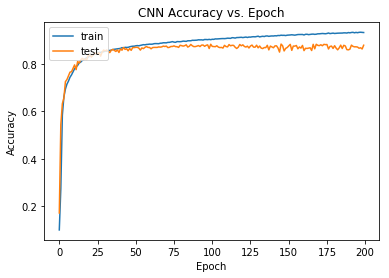

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_in_mdata.history['acc'])
plt.plot(CNN_dropout_in_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

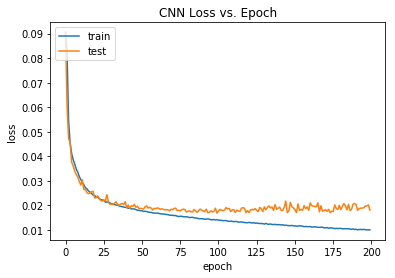

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_in_mdata.history['loss'])
plt.plot(CNN_dropout_in_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: CNN_dropout_in_mdata.history['loss']
  
2.   What does the loss of the testing set go to? 

  ANS: CNN_dropout_in_mdata.history['val_acc']

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS:

#Part 4: Dropout on Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
   
    model = Sequential()
    model.add(Conv2D(256,
                     (3,3),
                     activation='sigmoid',
                     input_shape=(28, 28, 1)))
    
    model.add(Dropout(0.3))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation = 'sigmoid'))
    
    model.add(Dropout(0.3))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(10,
                    activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_hidden.compile(loss='mean_squared_error',
                    optimizer='RMSprop',
                    metrics=['accuracy'])
#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_hidden_mdata = CNN_dropout_hidden.fit(data_train, labels_train,batch_size=1000,
                                    validation_data=(data_test, labels_test),
                                    epochs=200,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN

scores = CNN_dropout_hidden.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 338us/step - loss: 0.0980 - acc: 0.1047 - val_loss: 0.0899 - val_acc: 0.1000
Epoch 2/200
60000/60000 [==============================] - 20s 333us/step - loss: 0.0859 - acc: 0.2038 - val_loss: 0.0760 - val_acc: 0.4432
Epoch 3/200
60000/60000 [==============================] - 20s 333us/step - loss: 0.0605 - acc: 0.5258 - val_loss: 0.0594 - val_acc: 0.5631
Epoch 4/200
60000/60000 [==============================] - 20s 333us/step - loss: 0.0479 - acc: 0.6350 - val_loss: 0.0479 - val_acc: 0.6677
Epoch 5/200
60000/60000 [==============================] - 20s 332us/step - loss: 0.0423 - acc: 0.6826 - val_loss: 0.0410 - val_acc: 0.7121
Epoch 6/200
60000/60000 [==============================] - 20s 332us/step - loss: 0.0393 - acc: 0.7062 - val_loss: 0.0402 - val_acc: 0.7133
Epoch 7/200
60000/60000 [==============================] - 20s 333us/step - loss: 0.0370 - acc: 0.7251 - val_l

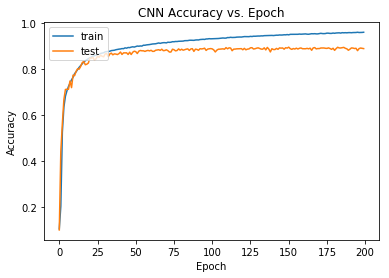

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_hidden_mdata.history['acc'])
plt.plot(CNN_dropout_hidden_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

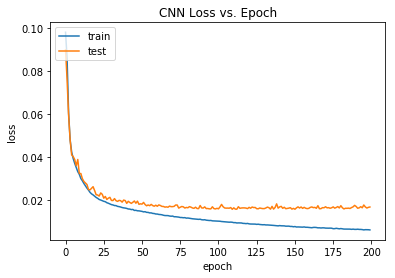

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_hidden_mdata.history['loss'])
plt.plot(CNN_dropout_hidden_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: CNN_dropout_hidden_mdata.history['loss']
  
2.   What does the loss of the testing set go to? 

  ANS: CNN_dropout_hidden_mdata.history['val_loss']

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: 
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: 

#Part 5: Dropout on Input and Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
 
    model = Sequential()
    model.add(Conv2D(256,
                     (3,3),
                     activation='sigmoid',
                     input_shape=(28, 28, 1)))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation = 'sigmoid'))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    model.add(Dense(10,
                    activation="softmax"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both.compile(loss='mean_squared_error',
                    optimizer='RMSprop',
                    metrics=['accuracy'])
#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_mdata = CNN_dropout_both.fit(data_train, labels_train,batch_size=1000,
                                    validation_data=(data_test, labels_test),
                                    epochs=200,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN

scores = CNN_dropout_both.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 201us/step - loss: 0.0907 - acc: 0.0964 - val_loss: 0.0900 - val_acc: 0.1000
Epoch 2/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0856 - acc: 0.2141 - val_loss: 0.0661 - val_acc: 0.5594
Epoch 3/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0561 - acc: 0.5605 - val_loss: 0.0449 - val_acc: 0.6720
Epoch 4/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0442 - acc: 0.6673 - val_loss: 0.0404 - val_acc: 0.7039
Epoch 5/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0404 - acc: 0.6985 - val_loss: 0.0389 - val_acc: 0.7075
Epoch 6/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0375 - acc: 0.7212 - val_loss: 0.0364 - val_acc: 0.7290
Epoch 7/200
60000/60000 [==============================] - 12s 196us/step - loss: 0.0357 - acc: 0.7347 - val_l

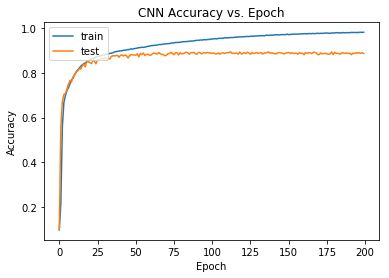

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_mdata.history['acc'])
plt.plot(CNN_dropout_both_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

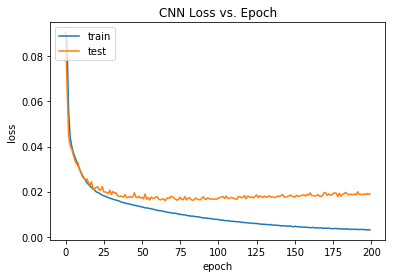

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_mdata.history['loss'])
plt.plot(CNN_dropout_both_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: CNN_dropout_both_mdata.history['loss']
  
2.   What does the loss of the testing set go to? 

  ANS:CNN_dropout_both_mdata.history['val_loss']
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: 
  
4.   Compare the plots obtained in this part to the plots from Part 4. Did using dropout in the input layer, in addition to using dropout in the hidden layers as in Part 4, significantly increase the robustness of your model? 

  ANS: 

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [4]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-09-15 19:58:57--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2.1’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  5.05MB/s    in 3m 36s  

2019-09-15 20:02:33 (5.51 MB/s) - ‘RML2016.10b.tar.bz2.1’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [5]:
#Create and train model architecture
def cldnn():
    model = Sequential()

    model.add(Conv2D(256,
                     (1,3),
                     activation='relu',
                     input_shape=(2, 128, 1)))

    model.add(Dropout(0.2))

    model.add(Conv2D(256,
                     (2,3),
                     activation = 'relu'))

    model.add(Conv2D(80,
                     (1,3),
                     activation = 'relu'))

    model.add(Dropout(0.2))

    model.add(Conv2D(80,
                     (1,3),
                     activation = 'relu'))

    model.add(Reshape((-1,192)))

    model.add(LSTM(50,
                   activation='relu'))

    model.add(Dense(128,
                   activation="relu",
                   kernel_initializer="normal"))

    model.add(Dense(10,
                    activation="softmax"))
    model.summary()
    return model

#Create instance of CNN model graph
cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
cldnn.compile(loss='mean_squared_logarithmic_error',
                    optimizer='Adam',
                    metrics=['accuracy'])
#Train the model and assign training meta-data to a variable
#FILL THIS IN
cldnn_mdata = cldnn.fit(X_train, Y_train, batch_size = 4000,
                                    validation_data=(X_test, Y_test),
                                    epochs=100,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN

scores = cldnn.evaluate(X_test, Y_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

W0915 20:10:34.088515 140417153619840 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0915 20:10:34.155153 140417153619840 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0915 20:10:34.181988 140417153619840 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0915 20:10:34.218605 140417153619840 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0915 20:10:34.232539 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 126, 256)       1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 126, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 124, 256)       393472    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 122, 80)        61520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 122, 80)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 120, 80)        19280     
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 192)           0         
__________

W0915 20:10:34.806309 140417153619840 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 199s 460us/step - loss: 0.0439 - acc: 0.1278 - val_loss: 0.0431 - val_acc: 0.1617
Epoch 2/100
432000/432000 [==============================] - 185s 427us/step - loss: 0.0404 - acc: 0.2059 - val_loss: 0.0389 - val_acc: 0.2470
Epoch 3/100
432000/432000 [==============================] - 183s 424us/step - loss: 0.0396 - acc: 0.2318 - val_loss: 0.0386 - val_acc: 0.2581
Epoch 4/100
432000/432000 [==============================] - 183s 423us/step - loss: 0.0378 - acc: 0.2820 - val_loss: 0.0353 - val_acc: 0.3506
Epoch 5/100
432000/432000 [==============================] - 183s 423us/step - loss: 0.0334 - acc: 0.3937 - val_loss: 0.0319 - val_acc: 0.4232
Epoch 6/100
432000/432000 [==============================] - 183s 423us/step - loss: 0.0297 - acc: 0.4819 - val_loss: 0.0271 - val_acc: 0.5441
Epoch 7/100
432000/432000 [==============================] - 183s 424us/step - loss: 0.023

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


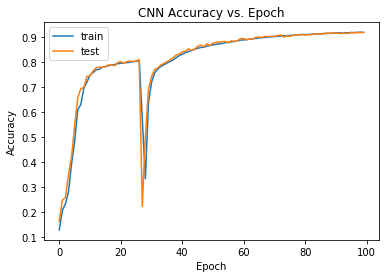

In [7]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cldnn_mdata.history['acc'])
plt.plot(cldnn_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

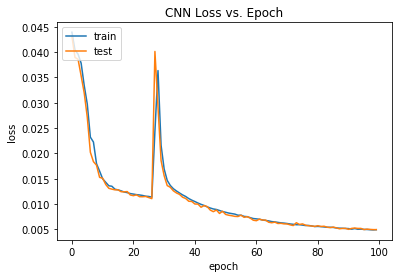

In [8]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cldnn_mdata.history['loss'])
plt.plot(cldnn_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes

2.   Give two ways to improve the robustness of the model.

  ANS: 